In [2]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

## Przypomnienie

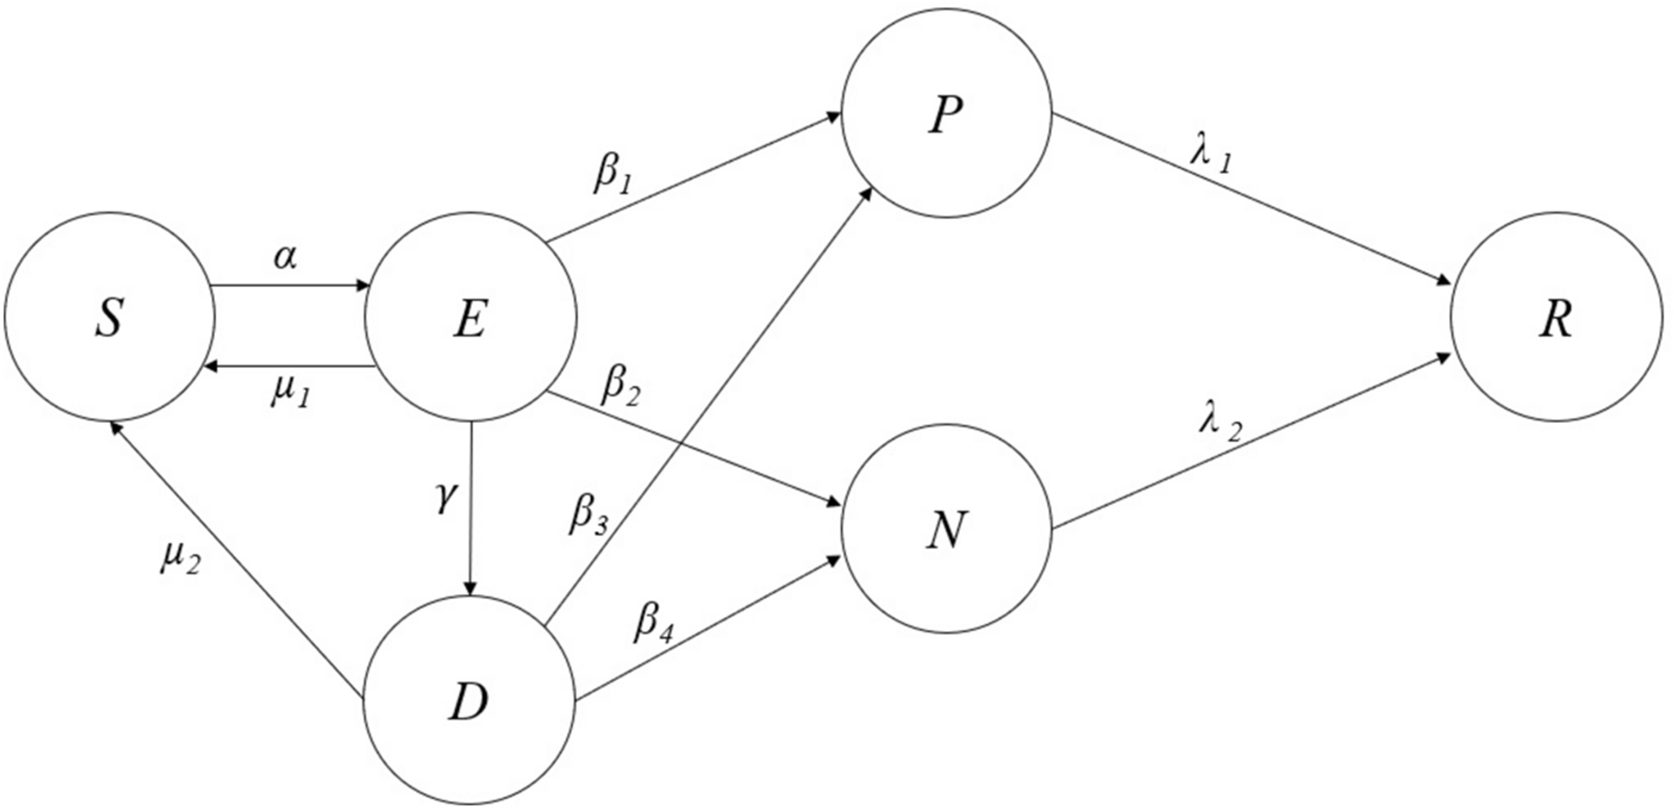

![image](system.png)

## System równań, parametry

In [3]:
def system(t, y, params):
    alpha, beta_1, beta_2, beta_3, beta_4, gamma, lambda_1, lambda_2, mu_1, mu_2 = params
    # s e d p r n
    ds = mu_1 * y[1] + mu_2 * y[2] - alpha * y[0]
    de = alpha * y[0] - ( beta_1 + beta_2 + gamma + mu_1) * y[1]
    dd = gamma * y[1] - (beta_3 + beta_4 + mu_2) * y[2]
    dp = beta_1 * y[1] + beta_3 * y[2] - lambda_1 * y[3]
    dn = beta_2 * y[1] + beta_4 * y[2] - lambda_2 * y[5]
    dr = lambda_1 * y[3] + lambda_2 * y[5]


    return [ds, de, dd, dp, dr, dn]



alpha, beta_1, beta_2, beta_3, beta_4, gamma, lambda_1, lambda_2, mu_1, mu_2 = 0.1, 0.5, 0.4, 0.5, 0.6, 0.1, 0.1, 0.1, 0.05, 0.05
params = [alpha, beta_1, beta_2, beta_3, beta_4, gamma, lambda_1, lambda_2, mu_1, mu_2]


eq_e = (alpha*(beta_3 + beta_4 + mu_2)*(lambda_1 + lambda_2))/(alpha*beta_3 + (beta_1 + beta_2 + gamma + mu_1)*lambda_1)

eq_d = (gamma * (lambda_1 + lambda_2) * (beta_1 + beta_2 + gamma + mu_1)) / \
    (gamma * beta_1 + (beta_3 + beta_4 + mu_2) * lambda_2)



## Współcznik reprodukcji - ile osób zarazi jeden chory

In [4]:
max(beta_1/ mu_1, beta_2 / mu_2)

10.0

In [5]:
num_trajectories = 300
y = []
for _ in range(num_trajectories):
    y_0 = np.array([
        np.random.randint(5000, 200000),  # s
        np.random.randint(400, 50000),  # e
        np.random.randint(600, 50000),  # d
        np.random.randint(10, 15000),  # p
        0, # r
        np.random.randint(10, 15000),  # n
    ])
    yy = solve_ivp(system, [0, 100], y_0, args=(params,))
    y.append(yy)

Popualcja w chwili 0: 109643.0


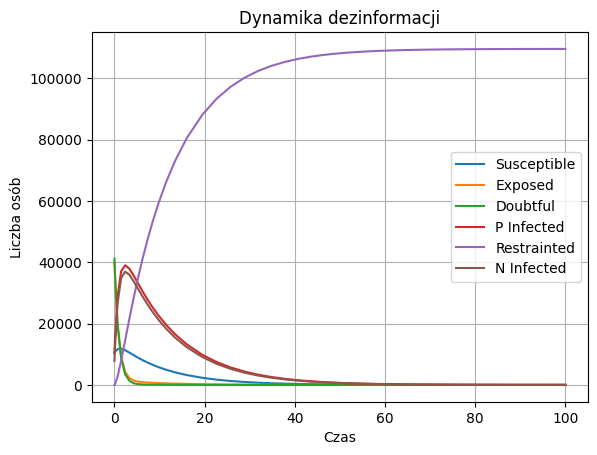

In [6]:
plt.plot(y[0].t, y[0].y[0], label='Susceptible')
plt.plot(y[0].t, y[0].y[1], label='Exposed')
plt.plot(y[0].t, y[0].y[2], label='Doubtful')
plt.plot(y[0].t, y[0].y[3], label='P Infected')
plt.plot(y[0].t, y[0].y[4], label='Restrainted')
plt.plot(y[0].t, y[0].y[5], label='N Infected')

plt.legend()
plt.xlabel('Czas')
plt.ylabel('Liczba osób')
plt.title('Dynamika dezinformacji')
plt.grid()

print('Popualcja w chwili 0:', y[0].y[0][0] + y[0].y[1][0] + y[0].y[2][0] + y[0].y[3][0] + y[0].y[4][0] + y[0].y[5][0])

W tej konfiguracji, ilość osób po zarażeniu diametralnie wzrasta między $0$ a $40$ jednostką czasową.

Text(0.5, 1.0, 'Wykres fazowy dla Suseptible')

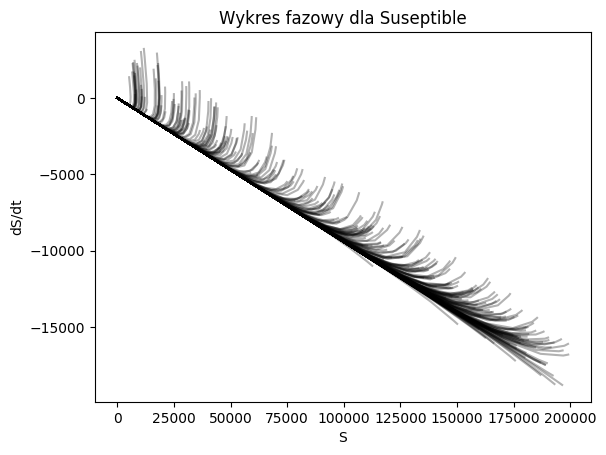

In [7]:
for _y in y:
    plt.plot(_y.y[0], mu_1 * _y.y[1] + mu_2 * _y.y[2] - alpha * _y.y[0], alpha=0.3, color='black')
plt.xlabel('S')
plt.ylabel('dS/dt')
plt.title('Wykres fazowy dla Suseptible')

Text(0.5, 1.0, 'Wykres fazowy dla Exposed')

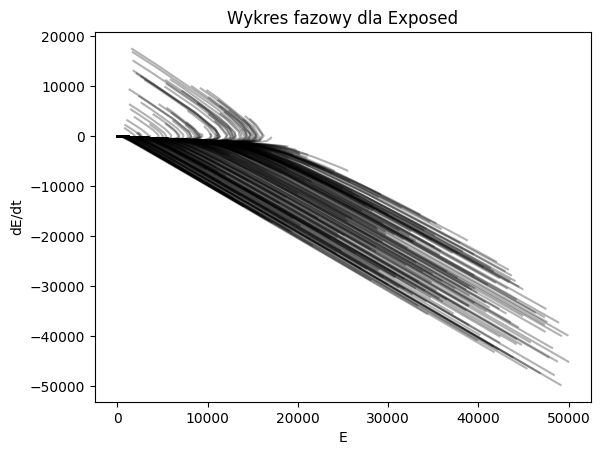

In [8]:
for _y in y:
    plt.plot(_y.y[1], alpha * _y.y[0] - ( beta_1 + beta_2 + gamma + mu_1) * _y.y[1], label='Exposed', alpha=0.3, color='black')

plt.xlabel('E')
plt.ylabel('dE/dt')
plt.title('Wykres fazowy dla Exposed')

Text(0.5, 1.0, 'Wykres fazowy dla Doubtful')

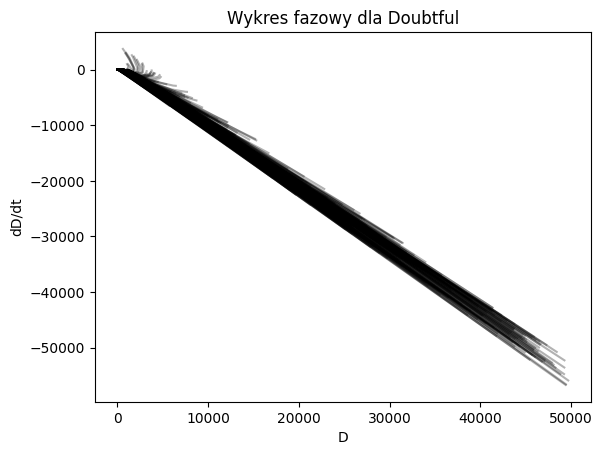

In [9]:
for _y in y:
    plt.plot(_y.y[2], gamma * _y.y[1] - (beta_3 + beta_4 + mu_2) * _y.y[2], label='Doubtful', alpha=0.3, color='black')
plt.xlabel('D')
plt.ylabel('dD/dt')
plt.title('Wykres fazowy dla Doubtful')

Text(0.5, 1.0, 'Wykres fazowy dla Positive Infected')

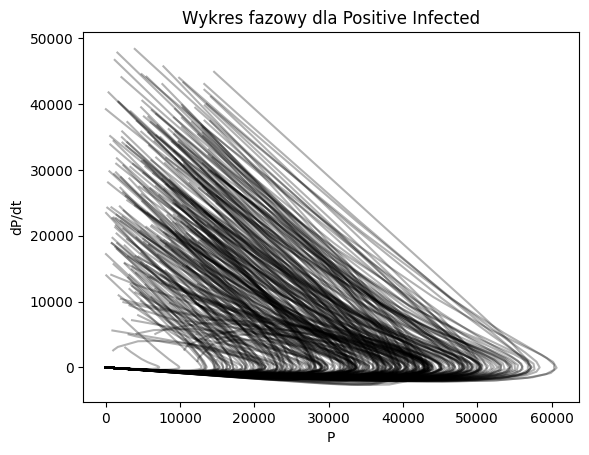

In [10]:
for _y in y:
    plt.plot(_y.y[3], beta_1 * _y.y[1] + beta_3 * _y.y[2] - lambda_1 * _y.y[3], label='P Infected', alpha=0.3, color='black')

plt.xlabel('P')
plt.ylabel('dP/dt')
plt.title('Wykres fazowy dla Positive Infected')

Text(0.5, 1.0, 'Wykres fazowy dla Negative Infected')

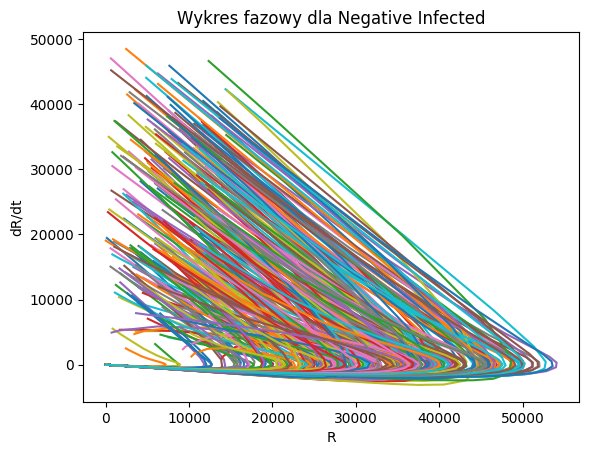

In [11]:
for _y in y:
    plt.plot(_y.y[5], beta_2 * _y.y[1] + beta_4 * _y.y[2] - lambda_2 * _y.y[5], label='Negative Infected',)
plt.xlabel('R')
plt.ylabel('dR/dt')
plt.title('Wykres fazowy dla Negative Infected')

Text(0.5, 1.0, 'Wykres fazowy dla Restrained')

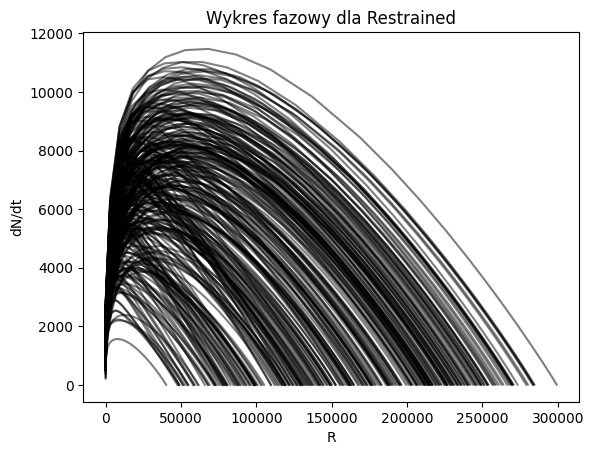

In [12]:
for _y in y:
    plt.plot(_y.y[4], lambda_1 * _y.y[3] + lambda_2 * _y.y[5], label='N Infected',  alpha=0.5, color='black')
plt.xlabel('R')
plt.ylabel('dN/dt')
plt.title('Wykres fazowy dla Restrained')

## Graf a układ równań - porównanie

In [13]:
def przejscie(y, from_index, to_index, p):
    if p > np.random.rand():
        if y[from_index] == 0:
            return y
        y[from_index] -= 1
        y[to_index] += 1
    return y

 # s e d p r n
przejscia = [
    (0, 1, alpha),  # s -> e
    (1, 0, mu_1), # e -> s
    (2, 0, mu_2),  # d -> s
    (1, 2, gamma) ,  # e -> d
    (1, 3, beta_1),  # e -> p
    (2, 3, beta_3),  # d -> p
    (1, 5, beta_2),  # e -> n
    (2, 5, beta_4),  # d -> n
    (3, 4, lambda_1),  # p -> r
    (5, 4, lambda_2)   # n -> r
]



def run_simulation(_y, num_steps):
    y = _y.copy()
    states = []
    for _ in range(num_steps):
        config = np.random.choice(len(przejscia), 1)[0]
        y = przejscie(y, *przejscia[config])
        states.append(y.copy())
    return np.array(states).T

In [14]:

alpha, beta_1, beta_2, beta_3, beta_4, gamma, lambda_1, lambda_2, mu_1, mu_2 = 0.1, 0.5, 0.4, 0.5, 0.6, 0.1, 0.1, 0.1, 0.05, 0.05
params = [alpha, beta_1, beta_2, beta_3, beta_4, gamma, lambda_1, lambda_2, mu_1, mu_2]

y_0 = [100, 400, 100, 10, 10, 0]
y = solve_ivp(system, [0, 100], y_0, args=(params,))

Popualcja w chwili 0: 620.0


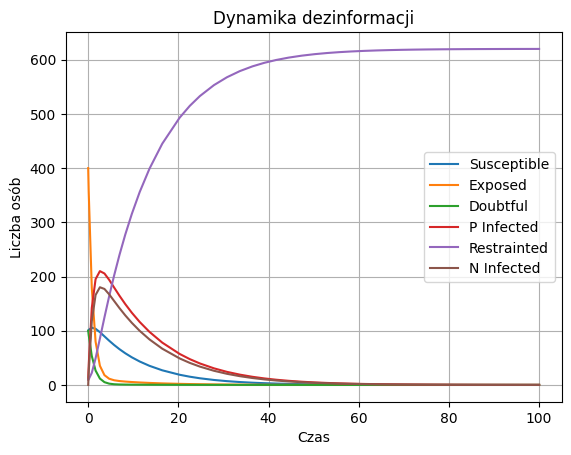

In [15]:
plt.plot(y.t, y.y[0], label='Susceptible')
plt.plot(y.t, y.y[1], label='Exposed')
plt.plot(y.t, y.y[2], label='Doubtful')
plt.plot(y.t, y.y[3], label='P Infected')
plt.plot(y.t, y.y[4], label='Restrainted')
plt.plot(y.t, y.y[5], label='N Infected')

plt.legend()
plt.xlabel('Czas')
plt.ylabel('Liczba osób')
plt.title('Dynamika dezinformacji')
plt.grid()

print('Popualcja w chwili 0:', np.sum(y.y[:, 0]))

In [16]:
y_2 = run_simulation(y_0, 100000)
t = np.linspace(0, 100, 100000)


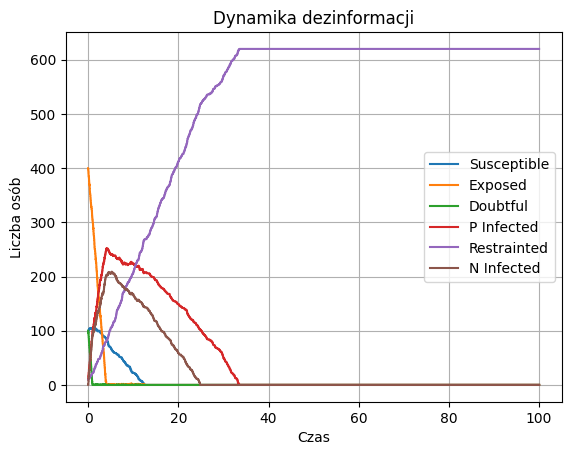

In [17]:
plt.plot(t, y_2[0], label='Susceptible')
plt.plot(t, y_2[1], label='Exposed')
plt.plot(t, y_2[2], label='Doubtful')
plt.plot(t, y_2[3], label='P Infected')
plt.plot(t, y_2[4], label='Restrainted')
plt.plot(t, y_2[5], label='N Infected')

plt.legend()
plt.xlabel('Czas')
plt.ylabel('Liczba osób')
plt.title('Dynamika dezinformacji')
plt.grid()